Contact tracing is a process used by public health ministries to help stop the spread of infectious disease such as COVID-19.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.cluster import DBSCAN
df = pd.read_json("C:\\Users\\medep\\Downloads\\livedata (1).json")

df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [18]:
df.shape[0]

100

In [19]:
df.shape

(100, 5)

In [20]:
#df.columns there are 4 cols like id,timestamp,latitude,longitude


In [21]:
BBox = (df.longitude.min(),df.longitude.max(),df.latitude.min(), df.latitude.max())
BBox
#i find the minimum longitude value,max longitude value,min,max value

(77.5533811, 77.7054541, 13.0102837, 13.2496455)

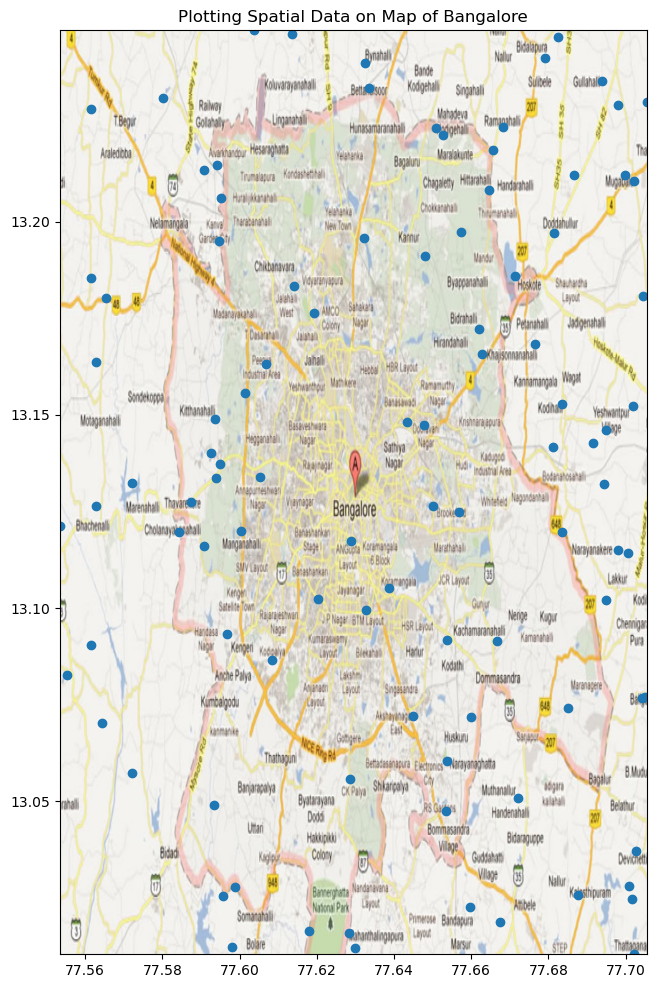

In [34]:
banglore_m = plt.imread(r"C:\Users\medep\OneDrive\Pictures\Screenshots\Screenshot 2024-04-21 014504.png")
fig, ax = plt.subplots(figsize = (16,12))
ax.scatter(df.longitude, df.latitude)
ax.set_title('Plotting Spatial Data on Map of Bangalore')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(banglore_m, extent = BBox, aspect= 'equal')
plt.show()#take pic from kag

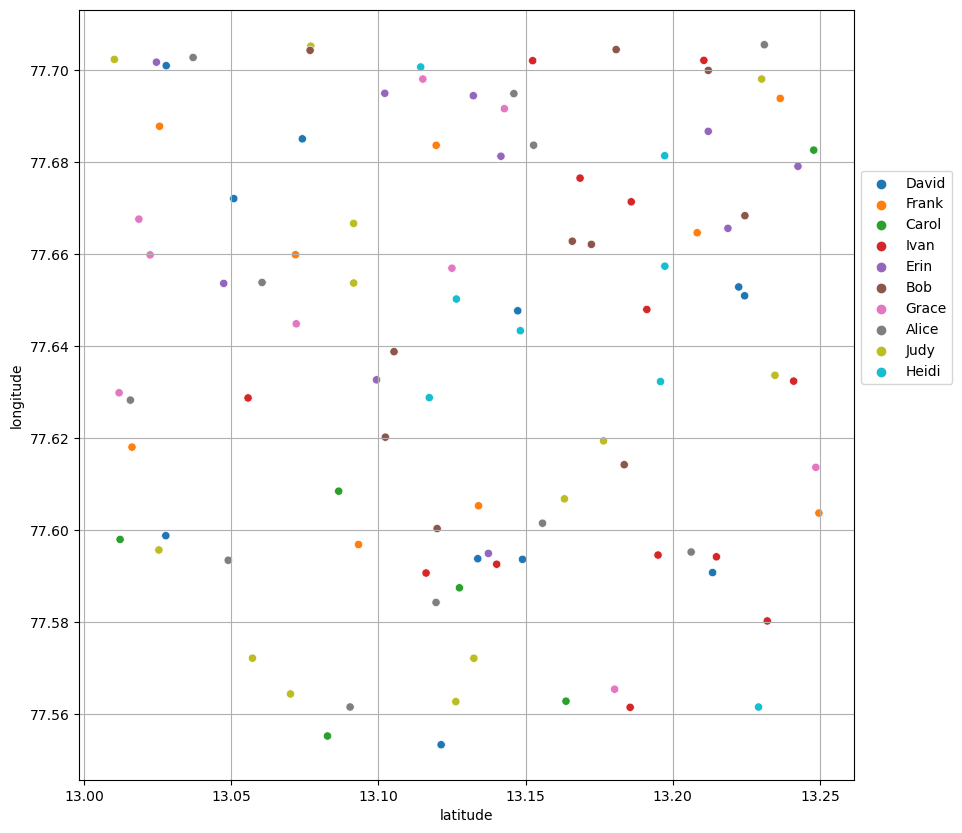

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="latitude",y="longitude",data=df,hue="id")
plt.legend(bbox_to_anchor= [1, 0.8])
plt.grid()

In [36]:
a=df[df.id=='Ivan']
a.head()

,id,timestamp,latitude,longitude,hour
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,23
16,Ivan,2020-07-04 20:35:30,13.241058,77.632370,21
18,Ivan,2020-07-04 12:35:30,13.194985,77.594589,13
20,Ivan,2020-07-04 21:35:30,13.055701,77.628720,22
22,Ivan,2020-07-04 13:35:30,13.168495,77.676476,14


In [38]:
def generateBaseMap(default_location, default_zoom_start=12):
 base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
 return base_map

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         100 non-null    object        
 1   timestamp  100 non-null    datetime64[ns]
 2   latitude   100 non-null    float64       
 3   longitude  100 non-null    float64       
 4   hour       100 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ KB


In [40]:
df.duplicated().value_counts()

False    100
Name: count, dtype: int64

In [41]:
df=df.drop_duplicates()

In [42]:
df.isnull().sum()

id           0
timestamp    0
latitude     0
longitude    0
hour         0
dtype: int64

In [43]:
df.dtypes

id                   object
timestamp    datetime64[ns]
latitude            float64
longitude           float64
hour                  int64
dtype: object

In [44]:
df.timestamp.head()[0]

Timestamp('2020-07-04 15:35:30')

In [45]:
# Converting column to datetime
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')#already the date column is in date format only
# Creating hour column
df['hour']=df['timestamp'].apply(lambda x: x.hour+1)
df.head(10)

,id,timestamp,latitude,longitude,hour
0,David,2020-07-04 15:35:30,13.148953,77.593651,16
1,David,2020-07-04 16:35:30,13.222397,77.652828,17
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,15
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,22
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,23
5,Erin,2020-07-04 14:35:30,13.132235,77.694382,15
6,Bob,2020-07-04 13:35:30,13.224501,77.668313,14
7,Grace,2020-07-04 14:35:30,13.142778,77.691560,15
8,Alice,2020-07-04 22:35:30,13.090368,77.561579,23
9,Frank,2020-07-04 12:35:30,13.208293,77.664607,13


In [47]:
df2=pd.DataFrame(df.groupby(['hour','id'])['timestamp'].max())
df2.reset_index(inplace=True) why da?
df2.head() # data manim codes ok d not exe

Object `da` not found.


timestamp
hour id                       
13   Alice 2020-07-04 12:35:30
     David 2020-07-04 12:35:30
     Frank 2020-07-04 12:35:30
     Grace 2020-07-04 12:35:30
     Ivan  2020-07-04 12:35:30

In [48]:
df3=pd.merge(df2,df,left_on=['hour','id','timestamp'],right_on=['hour','id','timestamp'])
df3.head() # data manim codes ok  d not exe

,hour,id,timestamp,latitude,longitude
0,13,Alice,2020-07-04 12:35:30,13.155742,77.601504
1,13,David,2020-07-04 12:35:30,13.027759,77.598796
2,13,David,2020-07-04 12:35:30,13.133737,77.593794
3,13,David,2020-07-04 12:35:30,13.074142,77.685008
4,13,Frank,2020-07-04 12:35:30,13.208293,77.664607


In [49]:
lat_long_list = []
for i in range(1,25):
     temp=[]
     for index, instance in df3[df3['hour'] == i].iterrows():
         temp.append([instance['latitude'],instance['longitude']])
         lat_long_list.append(temp)

In [51]:
pip install branca

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for branca from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [52]:
from branca.element import Element, Figure, Html, MacroElement


In [53]:

fig=Figure(width=550,height=350)

In [54]:
!pip install folium


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 262.6 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/100.0 kB 363.1 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 477.5 kB/s eta 0:00:00


In [55]:
import folium
from folium.plugins import HeatMapWithTime
fig7=Figure(width=850,height=550)
m7=folium.Map(location=[13.12, 77.8],zoom_start=10)
HeatMapWithTime(lat_long_list,radius=15,auto_play=True,position='bottomright').add_to(m7)
m7

In [56]:
def get_infected_names(input_name):

    epsilon = 5.721 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    print("hi")
    input_name_clusters = []
    for i in range(len(df)):
#         print("hi1")
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
#                 print("hi1")
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    
    return infected_names
# epsilon = 0.0018288 # a radi

In [57]:
print(get_infected_names('David'))

hi
['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']


In [58]:
df.id
#I changed epsilion value from some value to 5.721
#i changed min samples value to 3,100

0     David
1     David
2     Frank
3     Carol
4      Ivan
      ...  
95     Judy
96      Bob
97    Grace
98      Bob
99    Alice
Name: id, Length: 100, dtype: object

In [59]:
a=4
b=5
#
#iterate from 1 to 10.
l1=[]
for i in range(1,11):
    if i%2==0:
        pass
    else:
        l1.append(i**2)
print(l1)
#pass works as an if loop stmt.ctrl moves to next iteration .either if or else gets executed.

[1, 9, 25, 49, 81]


In [60]:
def get_infected_names(input_name):
    epsilon = 0.0018288
     # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    print("hi")
    input_name_clusters = []
    print(df)
    return None
    

In [61]:
get_infected_names('David')

hi
       id           timestamp   latitude  longitude  hour  cluster
0   David 2020-07-04 15:35:30  13.148953  77.593651    16       -1
1   David 2020-07-04 16:35:30  13.222397  77.652828    17       -1
2   Frank 2020-07-04 14:35:30  13.236507  77.693792    15       -1
3   Carol 2020-07-04 21:35:30  13.163716  77.562842    22       -1
4    Ivan 2020-07-04 22:35:30  13.232095  77.580273    23       -1
..    ...                 ...        ...        ...   ...      ...
95   Judy 2020-07-04 16:35:30  13.176481  77.619396    17       -1
96    Bob 2020-07-04 15:35:30  13.172339  77.662080    16       -1
97  Grace 2020-07-04 23:35:30  13.115079  77.697991    24       -1
98    Bob 2020-07-04 19:35:30  13.180751  77.704404    20       -1
99  Alice 2020-07-04 19:35:30  13.206235  77.595245    20       -1

[100 rows x 6 columns]


In [67]:
#DBSCAN (distance between nearest points)


In [69]:
# Function to calculate Haversine distance between two points
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Compute the distance matrix using the Haversine distance
n = len(df)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = haversine(df.iloc[i]['latitude'], df.iloc[i]['longitude'],
                                           df.iloc[j]['latitude'], df.iloc[j]['longitude'])

# Clustering using DBSCAN with precomputed distance matrix
epsilon = 100  # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 2  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='precomputed')
df['cluster'] = dbscan.fit_predict(distance_matrix)


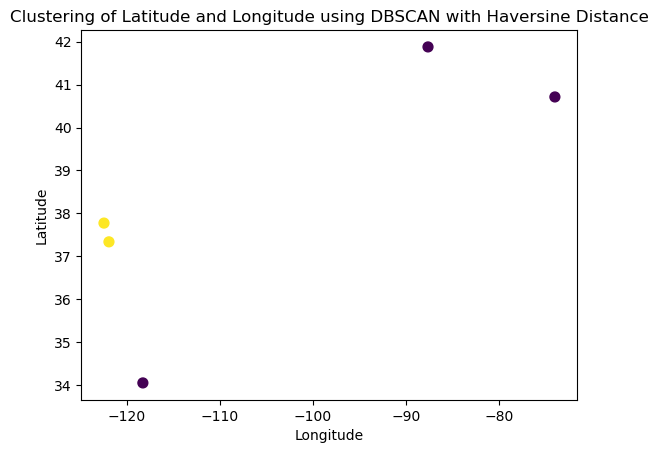

In [70]:
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Latitude and Longitude using DBSCAN with Haversine Distance')
plt.show()